In [61]:
import continuum_pc_emlines as cpe
import matplotlib.pyplot as plt
import time

%matplotlib inline

# Create the SED continua to read in

In [62]:
import numpy as np

# create wl grid file
wl_grid_file = '/mnt/drive2/BeckData/ProcessedData/wl_grid.txt'
wl_grid = np.arange(1000.,12000.,10.)
np.savetxt(wl_grid_file, wl_grid)

# this is where the logEW data are stored
gal_sample_file = '/mnt/drive2/BeckData/Spectra/galaxy_sample.txt'

# directory to output processed SDSS spectra continua
output_dir = '/mnt/drive2/BeckData/ProcessedData/'

# process all the spectra (save as separate files)
start_time = time.time()
nn = cpe.inp_spec(wl_grid_file, gal_sample_file, output_dir)
end_time = time.time()
print "Time to process spectra =", end_time-start_time
print "Number of spectra =", nn

finishing  7.25268349289 %
finishing  14.5053669858 %
finishing  21.7580504787 %
finishing  29.0107339716 %
finishing  36.2634174645 %
finishing  43.5161009574 %
finishing  50.7687844502 %
finishing  58.0214679431 %
finishing  65.274151436 %
finishing  72.5268349289 %
finishing  79.7795184218 %
finishing  87.0322019147 %
finishing  94.2848854076 %
Time to process spectra = 447.240602016
Number of spectra = 13788


In [63]:
# accumulate all continua in one file
outfile = output_dir + "spec_all.txt"
cpe.sum_spec(wl_grid_file, output_dir, nn, outfile)

finishing  7.25268349289 %
finishing  14.5053669858 %
finishing  21.7580504787 %
finishing  29.0107339716 %
finishing  36.2634174645 %
finishing  43.5161009574 %
finishing  50.7687844502 %
finishing  58.0214679431 %
finishing  65.274151436 %
finishing  72.5268349289 %
finishing  79.7795184218 %
finishing  87.0322019147 %
finishing  94.2848854076 %


# Compute the continua PC's

In [64]:
# file the continua are stored in
continua_file = outfile

# fileroot to write out PCA files to
outroot = '/mnt/drive2/BeckData/PCA/sdss_spec'

start_time = time.time()
contPCs = cpe.compute_eig_vec(continua_file, outroot, ndims=50)
end_time = time.time()
print "Time to calculate continuum PC's =", end_time-start_time

loading finished
starting SVD
finishing
Time to calculate continuum PC's = 67.6864669323


# Compare to Zongge's original code's calculation


0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0


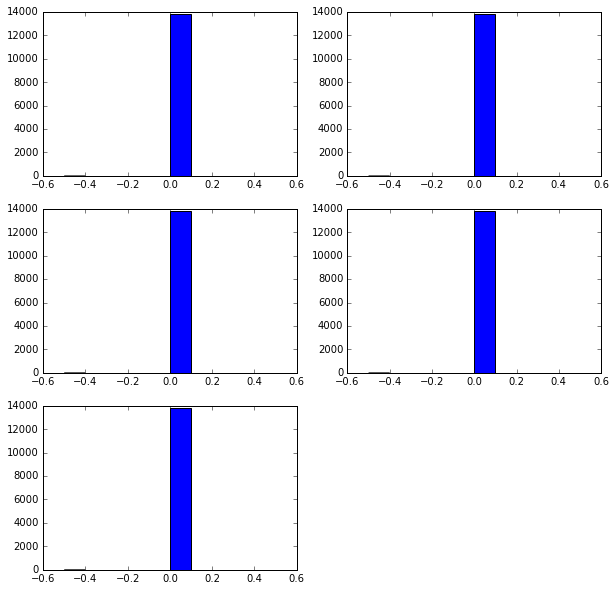

In [65]:
contPCs_zongge = np.loadtxt('/mnt/drive2/repos/zongge/emissionline/mycontPCA.txt')

fig = plt.figure(figsize=(10,10))
for i in range(5):
    
    ax = fig.add_subplot(3,2,i+1)
    ax.hist(contPCs[:,i]-contPCs_zongge[:,i])
    
    print np.min(contPCs[:,i]-contPCs_zongge[:,i]), 
    print np.mean(abs(contPCs[:,i]-contPCs_zongge[:,i])), 
    print np.std(abs(contPCs[:,i]-contPCs_zongge[:,i])),
    
    print np.sort(abs(contPCs[:,i]-contPCs_zongge[:,i]))[-1],
    print np.sort(abs(contPCs[:,i]-contPCs_zongge[:,i]))[0]

# Test logEW predictions

The `EmLinePaste` class below will be initialised as shown, and then called on each simulated galaxy spectrum to add emission lines to it.

In [66]:
reload(cpe)

continua_pc_file = '/mnt/drive2/BeckData/PCA/sdss_spec_50PCs.txt'
eigenV_file = '/mnt/drive2/BeckData/PCA/sdss_spec_eigenV.txt'
mean_spec_file = '/mnt/drive2/BeckData/PCA/sdss_spec_specMean.txt'
npc = 5
elp = cpe.EmLinePaste(continua_pc_file, eigenV_file, mean_spec_file, 
                       gal_sample_file, wl_grid_file, npc)

Below is a test of separate methods in the unfinished class `EmLinePaste`. In the final version of the class, there will be a single method that calls `_re_grid_wl()`, `_get_query_spec_pcs()`, `_pred_logEW()`, then a method that adds the emission lines onto the original spectrum and returns it will be called.

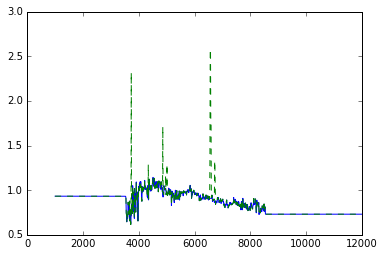

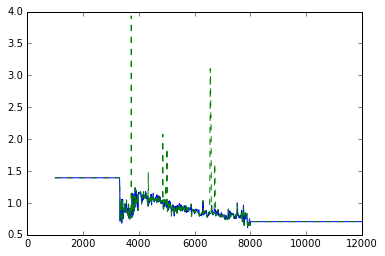

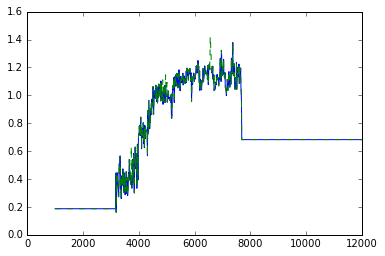

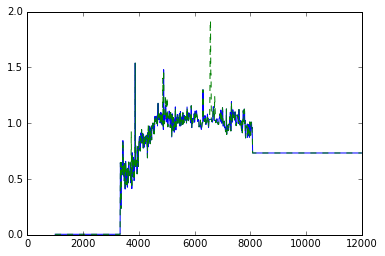

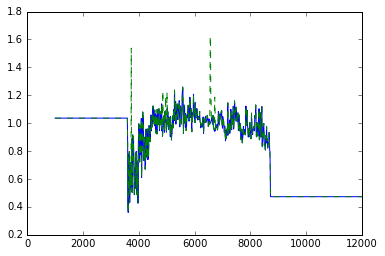

In [70]:


# zongge's est_ems
estem_zl = np.loadtxt('/mnt/drive2/repos/zongge/emissionline/est_ems.txt')

# my processed continua
spec_me = np.loadtxt('/mnt/drive2/BeckData/ProcessedData/spec_all.txt')

kNN = 30
estem = np.zeros((nn,10))
for i in np.arange(nn):
    
    ### use the class methods separately to check predicted emission lines
    # to ones from Zongge's code (sanity check)
    
    # re-grid the spectrum
    spec = elp._re_grid_wl(wl_grid, spec_me[i,:])

    # the 5 continuum PC's for this spectrum
    proj = elp._get_query_spec_pcs(spec)
    
    # predict emission line
    estem[i], _ = elp._pred_logEW(proj, kNN)
    
    
    
    ### now do an actual demo adding the lines to a spectrum
    ### just for the first few
    
    if (i<5):
        
        new_spec = elp.add_emission_lines(wl_grid, spec_me[i,:], kNN=30)
        new_wl = elp.wl
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(wl_grid, spec_me[i,:])
        ax.plot(new_wl, new_spec, linestyle='dashed')


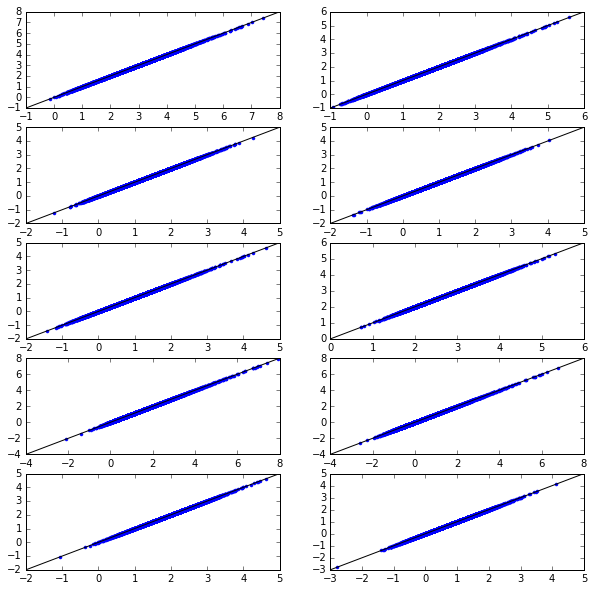

In [71]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    
    ax = fig.add_subplot(5,2,i+1)
    ax.plot(estem[:,i], estem_zl[:,i], linestyle='none', marker='.')
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    axmin = np.min([xlims[0], ylims[0]])
    axmax = np.max([xlims[1], ylims[1]])
    ax.plot([axmin, axmax], [axmin, axmax], color='black')